In [49]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
df = pd.read_csv("C:\\Users\\Dell\\Desktop\\deepsa\\data\\final_data.csv")
print(" Dataset shape:", df.shape)
print(" Columns:\n", df.columns.tolist())
print(" Data Types:\n")
print(df.dtypes)

print(" Summary Statistics:\n")
print(df.describe())

print(" Missing Values:\n")
print(df.isnull().sum())


 Dataset shape: (1000, 9)
 Columns:
 ['age', 'sex', 'aps', 'sps', 'num.co', 'wblc', 'income', 'time_active', 'dropout']
 Data Types:

age            float64
sex              int64
aps            float64
sps            float64
num.co           int64
wblc           float64
income           int64
time_active    float64
dropout          int64
dtype: object
 Summary Statistics:

               age          sex          aps          sps       num.co  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     65.168875     0.515000    50.227942    37.029439     1.957000   
std       9.718408     0.500025    14.506495    14.320745     1.314107   
min      32.587327     0.000000    10.000000     0.000000     0.000000   
25%      58.524097     0.000000    40.359920    27.922265     1.000000   
50%      65.253006     1.000000    50.103973    36.600937     2.000000   
75%      71.479439     1.000000    59.990320    46.359604     3.000000   
max      90.000000     1.000000

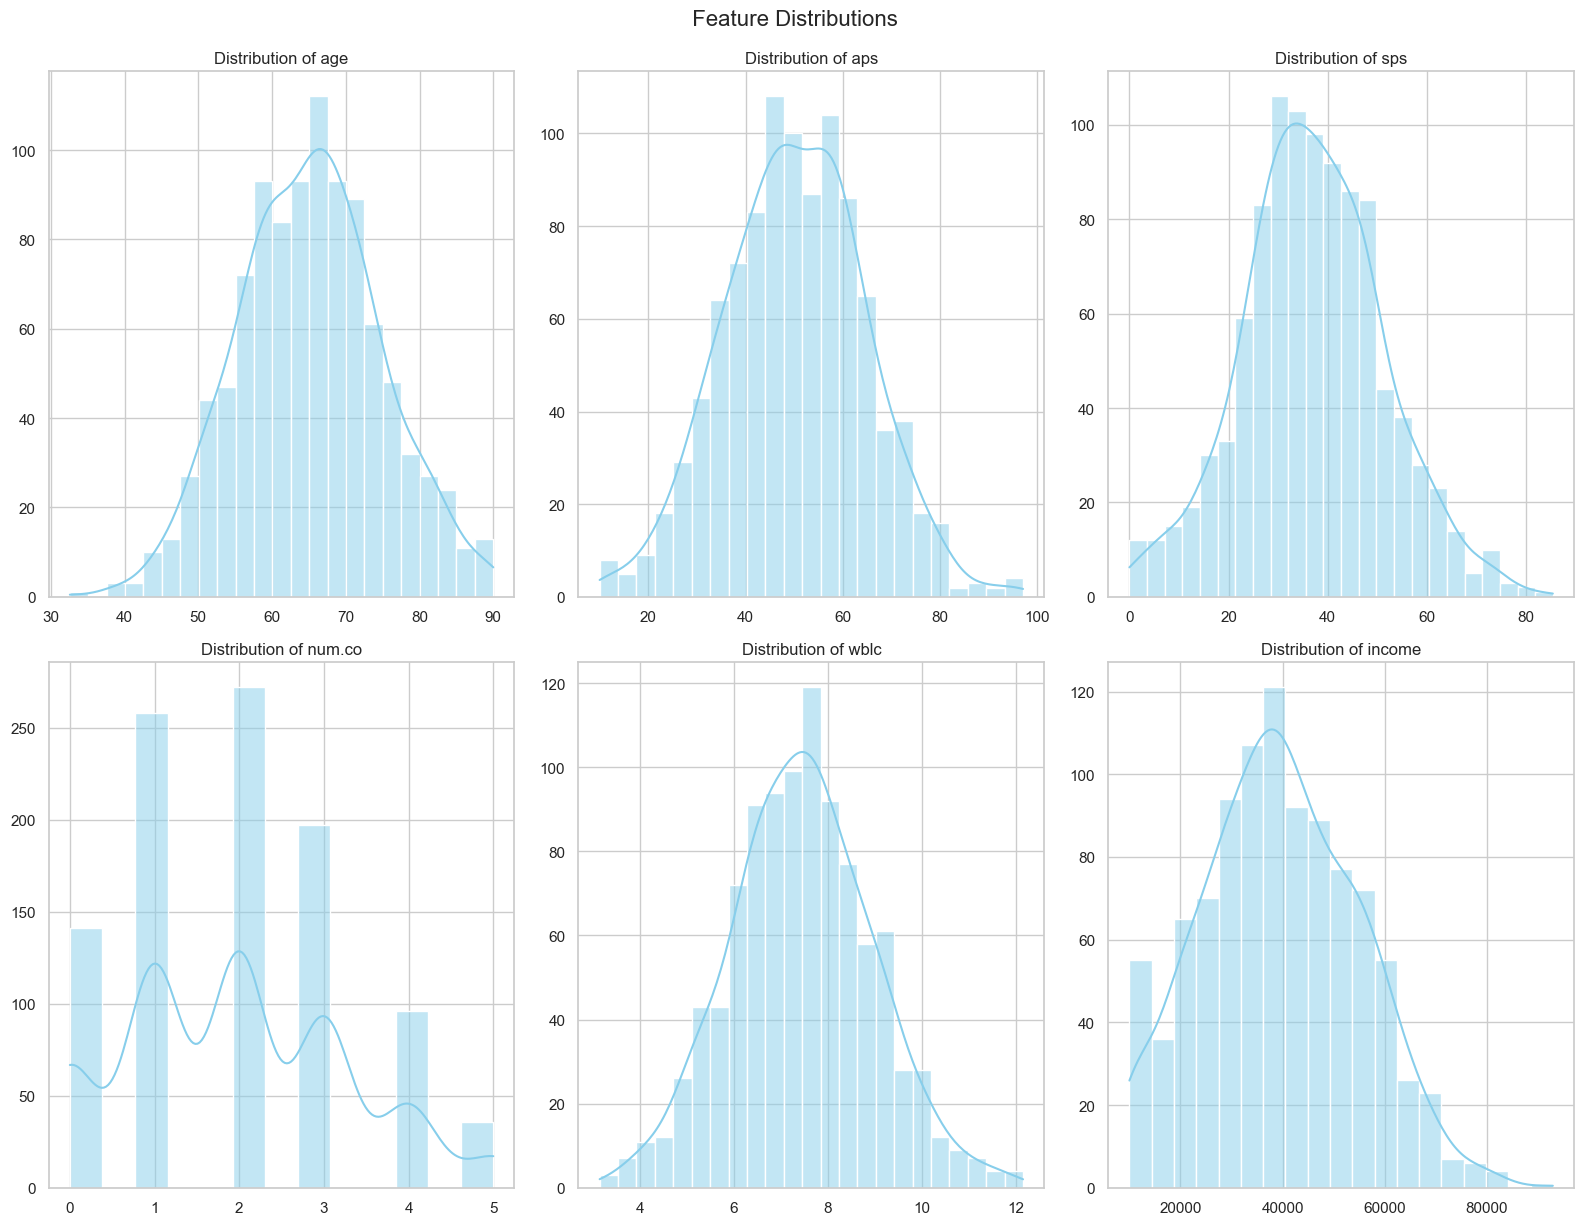

In [50]:
# 4. Visualize distributions of all numeric features (except targets)
numeric_cols = ['age', 'aps', 'sps', 'num.co',  'wblc', 'income']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
axs = axs.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axs[i], color='skyblue')
    axs[i].set_title(f'Distribution of {col}', fontsize=12)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
plt.tight_layout()
plt.suptitle(" Feature Distributions", fontsize=16, y=1.02)
plt.show()


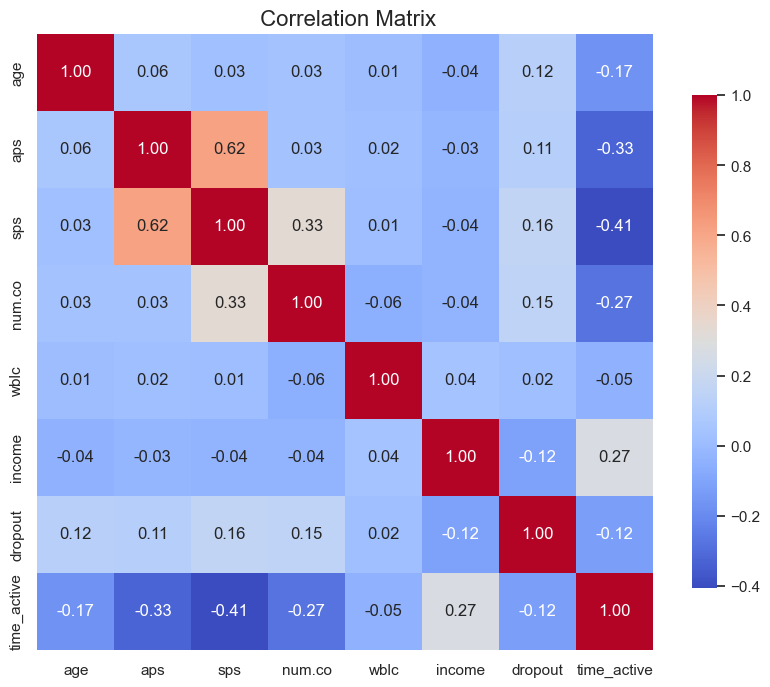

In [51]:
# 5. Correlation Matrix (numeric features + target)
corr_cols = numeric_cols + ['dropout', 'time_active']
corr_matrix = df[corr_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': 0.8})
plt.title(" Correlation Matrix", fontsize=16)
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_3352\514496505.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dropout', y=col, data=df, ax=axs[i], palette='Set2')
C:\Users\Dell\AppData\Local\Temp\ipykernel_3352\514496505.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dropout', y=col, data=df, ax=axs[i], palette='Set2')
C:\Users\Dell\AppData\Local\Temp\ipykernel_3352\514496505.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dropout', y=col, data=df, ax=axs[i], palette='Set2')
C:\Users\Dell\AppData\Local\Temp\ipykernel_3352\5

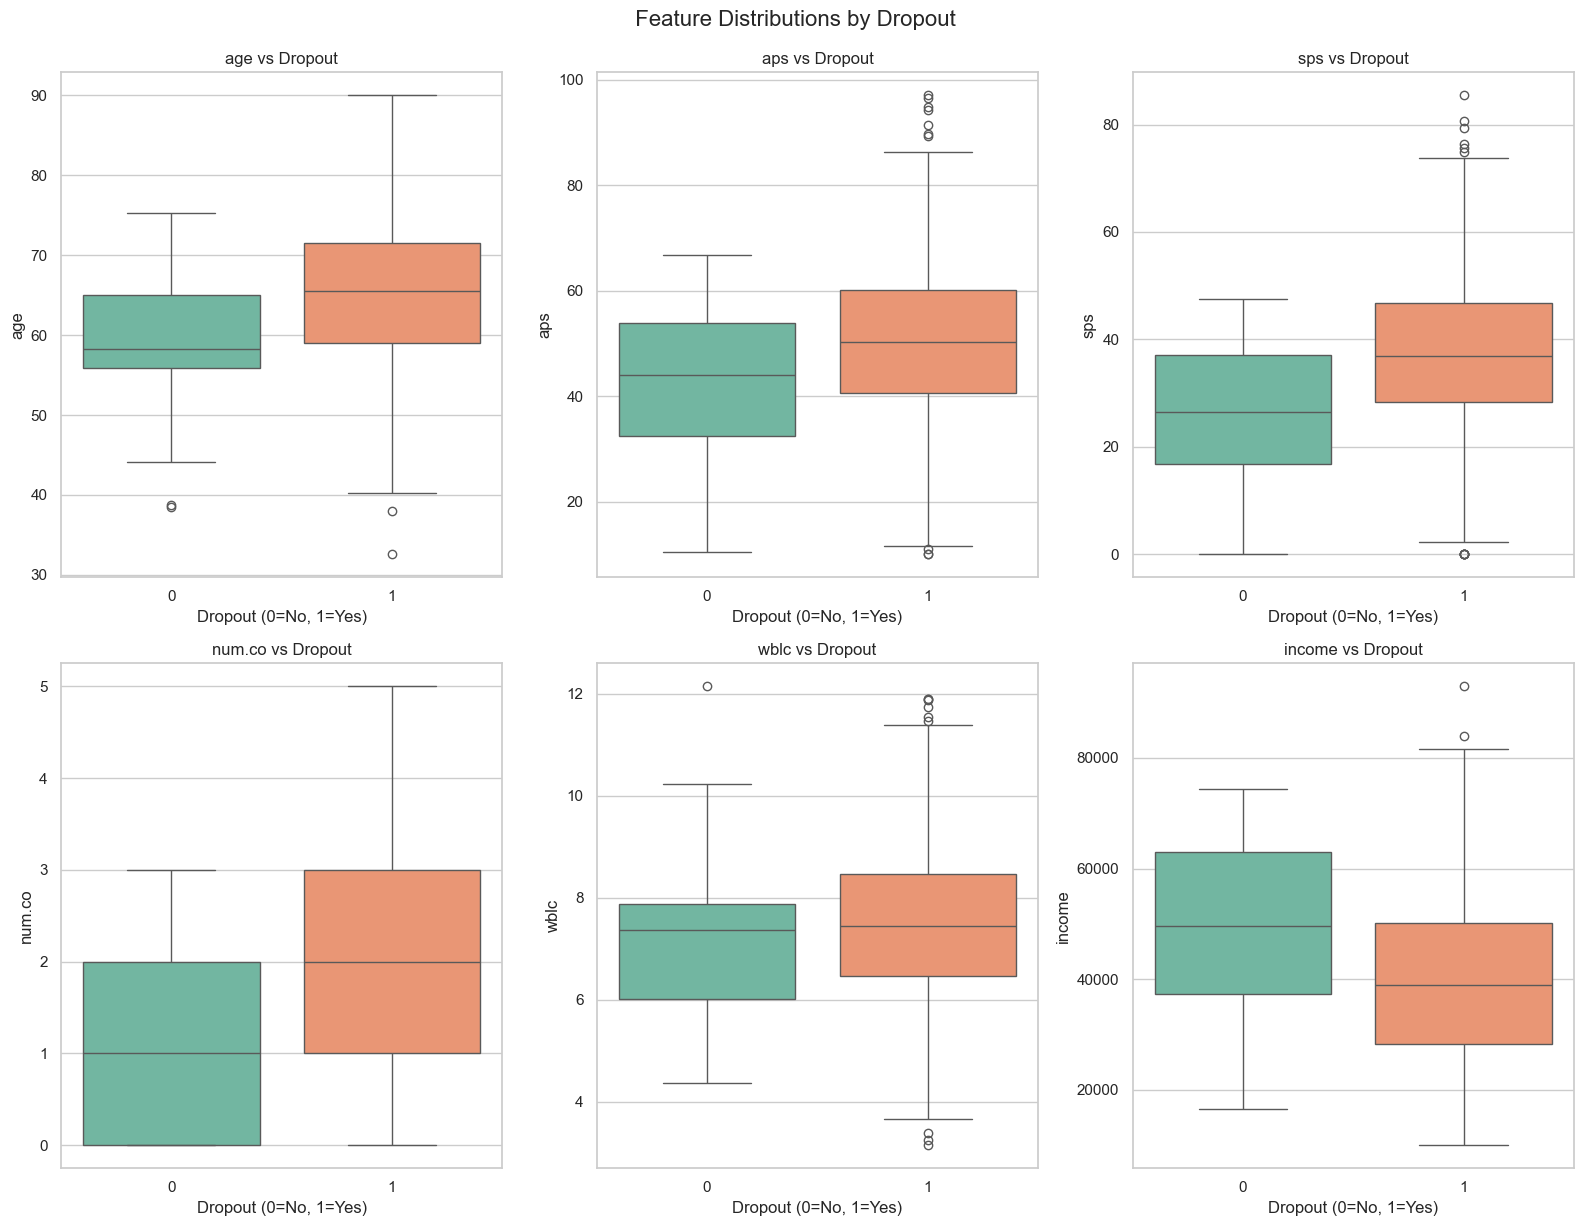

In [52]:
# Features to visualize against dropout
features_to_plot = ['age', 'aps', 'sps', 'num.co',  'wblc', 'income']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
axs = axs.flatten()
for i, col in enumerate(features_to_plot):
    sns.boxplot(x='dropout', y=col, data=df, ax=axs[i], palette='Set2')
    axs[i].set_title(f"{col} vs Dropout")
    axs[i].set_xlabel("Dropout (0=No, 1=Yes)")
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.suptitle(" Feature Distributions by Dropout", fontsize=16, y=1.02)
plt.show()


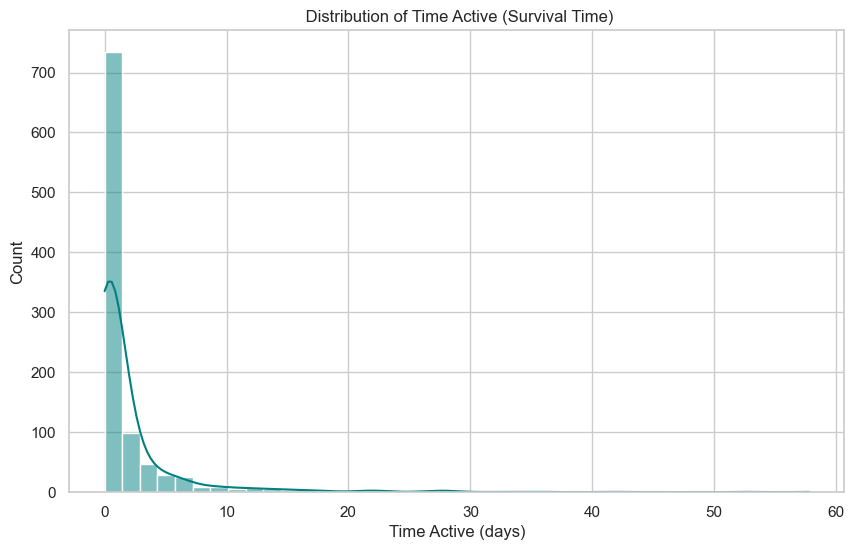

In [53]:
# Overall distribution of survival time
sns.histplot(df['time_active'], bins=40, kde=True, color='teal')
plt.title(" Distribution of Time Active (Survival Time)")
plt.xlabel("Time Active (days)")
plt.ylabel("Count")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_3352\3408220284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dropout', y='time_active', data=df, palette='coolwarm')
C:\Users\Dell\anaconda3\envs\sa-deep\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Dell\anaconda3\envs\sa-deep\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


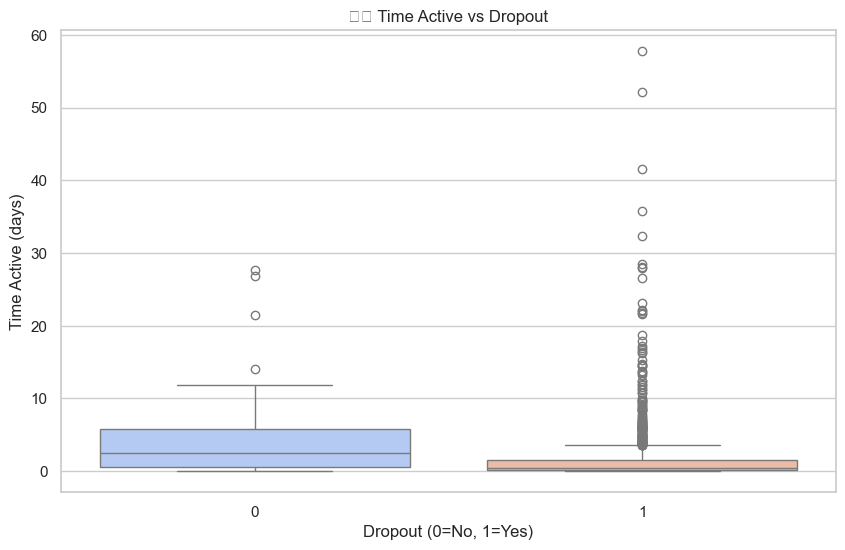

In [54]:
# Boxplot: time_active vs dropout
sns.boxplot(x='dropout', y='time_active', data=df, palette='coolwarm')
plt.title("⏱️ Time Active vs Dropout")
plt.xlabel("Dropout (0=No, 1=Yes)")
plt.ylabel("Time Active (days)")
plt.show()


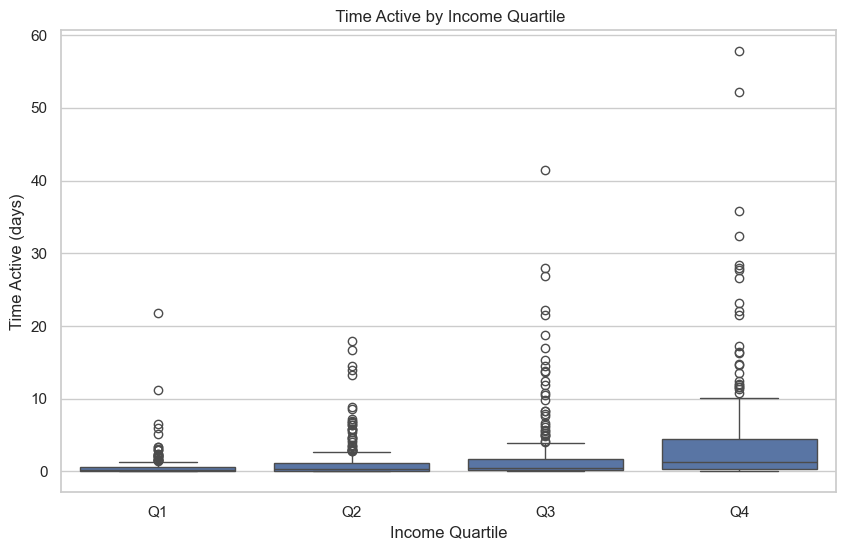

In [55]:

df['income_bin'] = pd.qcut(df['income'], q=4, labels=["Q1", "Q2", "Q3", "Q4"])
sns.boxplot(x='income_bin', y='time_active', data=df)
plt.title(" Time Active by Income Quartile")
plt.xlabel("Income Quartile")
plt.ylabel("Time Active (days)")
plt.show()


In [56]:

risk_score = (
    0.03 * df['age'] +
    0.08 * df['aps'] +
    0.05 * df['sps'] +
    0.07 * df['num.co'] +
     +
    0.002 * df['wblc'] +
     +
    0.00005 * (90000 - df['income']) +
    0.5 * df['sex']
)
df['risk_score'] = risk_score


In [57]:
df['risk_group'] = pd.qcut(df['risk_score'], q=3, labels=["Low", "Medium", "High"])


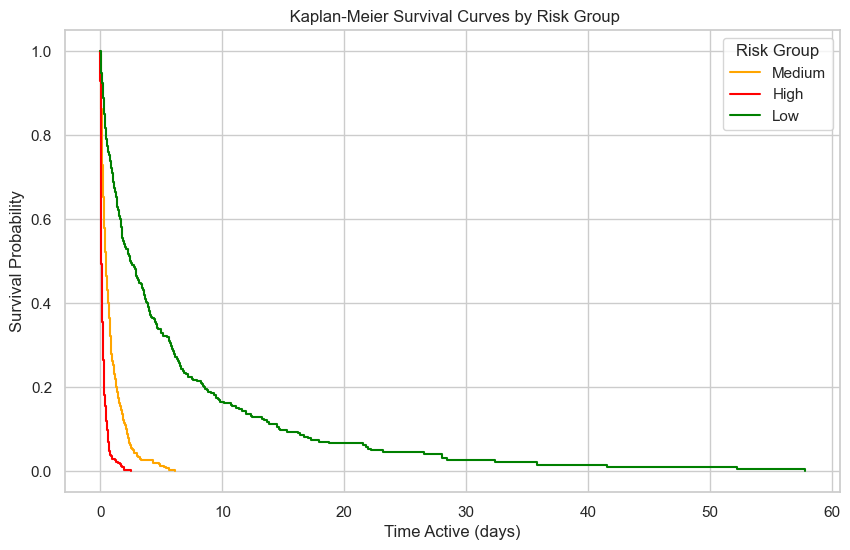

In [58]:
kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))
colors = {'Low': 'green', 'Medium': 'orange', 'High': 'red'}

for group in df['risk_group'].unique():
    mask = df['risk_group'] == group
    kmf.fit(durations=df.loc[mask, 'time_active'], 
            event_observed=df.loc[mask, 'dropout'], 
            label=group)
    kmf.plot(ci_show=False, color=colors[group])

plt.title(" Kaplan-Meier Survival Curves by Risk Group")
plt.xlabel("Time Active (days)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.legend(title="Risk Group")
plt.show()
